In [1]:
import torch
import cv2
import open_clip

c:\Users\Juanma\anaconda3\envs\new-tfg\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
model, _, preprocess = open_clip.create_model_and_transforms('ViT-g-14', pretrained='laion2b_s34b_b88k')
model.to('cuda')

In [4]:
tokenizer = open_clip.get_tokenizer('ViT-g-14')

In [ ]:
import csv

IMAGES_DIR = 'Final_dataset_small\Train\Amarillo'
CLASES = 'objetos.csv'

# Cargamos el archivo csv con los nombres de las clases
with open(CLASES, newline='', encoding='utf-8') as csvfile:
    reader = csv.reader(csvfile, delimiter=',', quotechar='|')
    clases = list(reader)

placeholder = 'A photo of a {}.'

eng_clases = [clase[1] for clase in clases]
esp_clases = [clase[0] for clase in clases]
clases = [clase[2] for clase in clases]

eng_clases_ = [placeholder.format(clase) for clase in eng_clases]

text = tokenizer(eng_clases_)

Clases posibles: ['Aceite de cocina', 'Botella de aceite de cristal', 'Botella de vidrio', 'Botella de cristal', 'Botella de plástico']


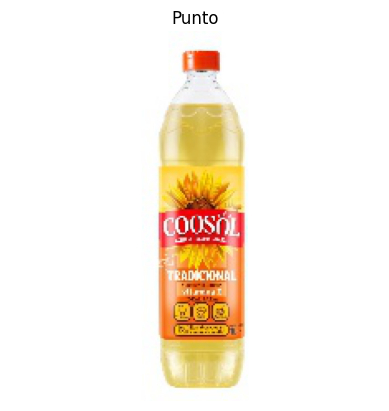

Clases posibles: ['Latas de bebida', 'Lata de conserva', 'Latas férricas', 'Mechero', 'Envase monodosis de papel']


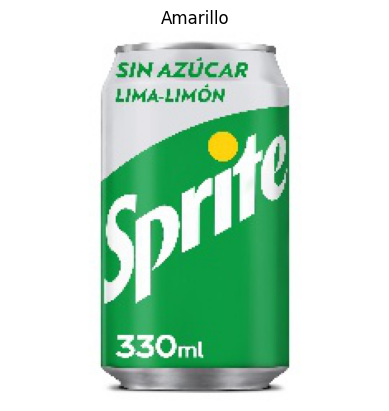

Clases posibles: ['Brik', 'Envase cartón alimentos y bebidas', 'Envase monodosis de papel', 'Envases monodosis', 'Lata de conserva']


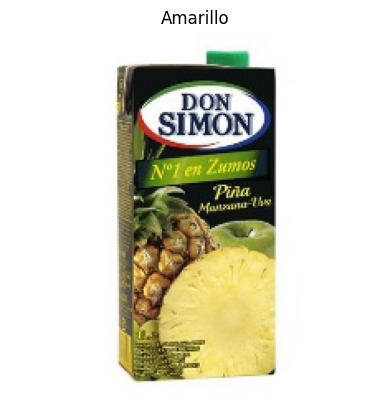

Clases posibles: ['Brik', 'Envase cartón alimentos y bebidas', 'Yogur de vidrio', 'Malla de fruta', 'Envases monodosis']


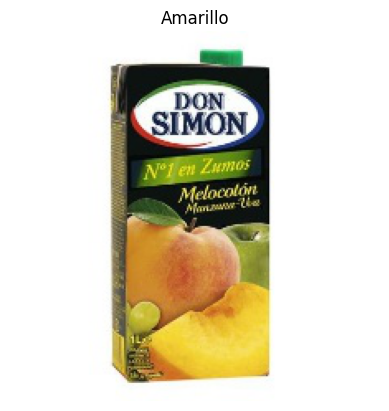

Clases posibles: ['Envase cartón alimentos y bebidas', 'Botella de vidrio', 'Botella de cristal', 'Caja de cereales', 'Aceite de cocina']


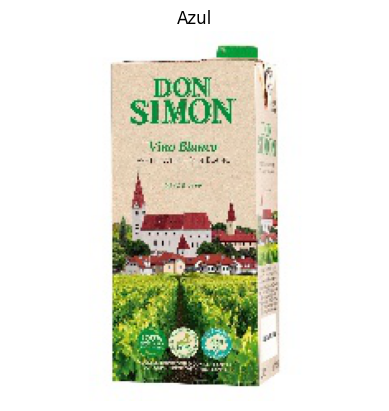

Clases posibles: ['Envase cartón alimentos y bebidas', 'Brik', 'Aceite de cocina', 'Caja de cereales', 'Botella de vidrio']


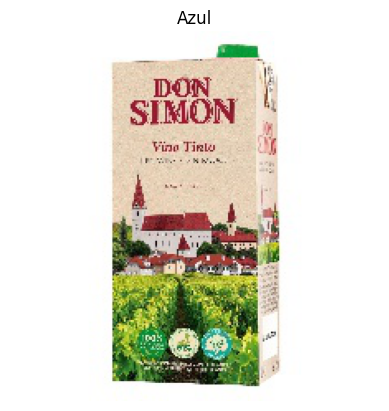

In [30]:
import os
import matplotlib.pyplot as plt
from PIL import Image

with torch.no_grad(), torch.cuda.amp.autocast():
    for image_dir in os.listdir(IMAGES_DIR):
        image = Image.open(os.path.join(IMAGES_DIR, image_dir))
        
        image_pre = preprocess(image).unsqueeze(0).to('cuda')
        
        image_features = model.encode_image(image_pre)
        text_features = model.encode_text(text.to('cuda'))
        image_features /= image_features.norm(dim=-1, keepdim=True)
        text_features /= text_features.norm(dim=-1, keepdim=True)

        text_probs = (100.0 * image_features @ text_features.T).softmax(dim=-1)
        top_probs, top_labels = text_probs.cpu().topk(5)

        posible_clases = [esp_clases[top_label] for top_label in top_labels[0]]
        print('Clases posibles: {}'.format(posible_clases))

        # Visualizamos la imagen
        plt.title(clases[top_labels[0][0]])
        plt.imshow(image)
        plt.axis('off')
        plt.show()
